## Exploration02 A.손글씨 분류/ B.와인 분류/ C. 유방암 분류

### A,B,C-(1) 필요한 모듈 import 하기 - (손글씨, 와인, 유방암 분류 공통)

- 데이터를 전처리하고 시각화하고 모델을 돌리는데 필요한 라이브러리 중에서 공통된 것이 많아서 3가지 데이터셋 모두에 필요한 모듈들을 한번에 import 했다.

In [79]:
%pprint

Pretty printing has been turned ON


In [80]:
# 전처리 라이브러리
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 시각화 라이브러리
import matplotlib.pyplot as plt # 그래프 및 이미지 출력하기 위한 라이브러리
import seaborn as sns
%matplotlib inline

# 데이터셋 
from sklearn.datasets import load_digits # digits 손글씨 데이터셋
from sklearn.datasets import load_wine # 와인 데이터셋
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋

# train, test 데이터셋 나누기
from sklearn.model_selection import train_test_split 

# 예측 알고리즘
from sklearn.tree import DecisionTreeClassifier # 의사결정나무
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트
from sklearn import svm # 서포트벡터머신
from sklearn.linear_model import SGDClassifier # SGD
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

# 예측 평가지표
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import f1_score,recall_score

# 기타
import warnings
warnings.filterwarnings(action="ignore")

## 프로젝트 A - load_digits: 손글씨 분류
- mnist 숫자 손글씨 데이터셋을 0~10까지 분류해보자.

### A-(2) 데이터 준비

In [81]:
digits=load_digits() #  digits 손글씨 데이터 준비

### A-(3) 데이터 이해하기

- feature data 지정하기
- label data 지정하기
- target names 출력해보기


In [82]:
X=digits.data # feature data를 X에
Y=digits.target # target data를 Y에 지정한다.
label=digits.target_names # target names- 정답 데이터들에 뭐가 있나 볼수 있다.
print("Target Names 출력하기:",label)

Target Names 출력하기: [0 1 2 3 4 5 6 7 8 9]


- 데이터 Describe 해보기

데이터의 모양
    - 훈련 데이터셋의 갯수는 1797개, 설명변수(features) 64개 있다. 정답(target)은 1797개이고, 각각 하나의 숫자로 이뤄져있다.

In [83]:
print(X.shape,  Y.shape)

(1797, 64) (1797,)


In [84]:
feature_names=np.arange(0,X.shape[1],1)
mnist=pd.DataFrame(X, columns=feature_names)
mnist["Y"]=Y

In [85]:
mnist.head() # 데이터의 첫부분

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Y
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


결측치 유무 
- load_digits() 로 불러온 숫자손글씨 데이터는 결측치가 없다는 것을 알수 있다.

In [86]:
print("각 컬럼별 결측치의 개수:",mnist.isnull().sum())
print("데이터 프레임 전체의 결측치 개수:", mnist.isnull().sum().sum())


각 컬럼별 결측치의 개수: 0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
Y     0
Length: 65, dtype: int64
데이터 프레임 전체의 결측치 개수: 0


In [87]:
mnist.describe() # 데이터의 대푯값들

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Y
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


설명변수가 65개라서 모두 한눈에 들어오지는 않지만, 설명변수 0과 1,2,3,4등이 각 데이터의 평균과 표준편차의 차이가 크다는 점만 보더라도 각 설명변수의 범위와 크기차이가 있다는 것을 가늠할 수 있다.

- 설명변수의 크기가 64개인 이유는 위와 같이 가로(8) x 세로(8)=면적(64)이라서 총 64픽셀이고 각 픽셀의 밝기를 숫자로 표현했다. 어두운 값은 0, 가장 밝은 값이 16이다. 즉 이 숫자들은 픽셀의 밝기를 의미하는 것이다.
- 각 설명변수는 컬럼의 이름은 아래의 표에 위치한 픽셀의 위치와 매칭시켜서 생각하면 된다.

|0|1|2|3|4|5|6|7|
|-|-|-|-|-|-|-|-|
|8|9|10|11|12|13|14|15|
|16|17|18|19|20|21|22|23|
|24|25|26|27|28|29|30|31|
|32|33|34|35|36|37|38|39|
|40|41|42|43|44|45|46|47|
|48|49|50|51|52|53|54|55|
|56|57|58|59|60|61|62|63|


- 각 칼럼은 이미지의 픽셀 위치라는 의미만 있을 뿐 다른 의미가 없어서 0~63으로 feature의 이름을 지었다. 컬럼별로 다르게 전처리를 할 필요없이 전체적으로 고르게 학습이 되게 하기 위해서 정규화를 시켜주면 될 것 같다.
- 단, 픽셀의 위치에 따라서 거의 모든 이미지에서 0이거나 0에 가까운 픽셀이고 (예를들어 0번), 어떤 위치의 거의 모든 위치에서 높은 값을 가질수도 있다. 또 어떤 픽셀은 이미지에 따라서 밝은부분이 제각각 다르기 때문에 숫자 손글씨 데이터셋(mnist 데이터셋)의 데이터의 패턴으로 분류가 가능할 것으로 보인다.
- 이렇게 정수 0~63까지의 설명변수를 컬럼명으로 만들고, Y는 해당 설명변수의 정답이자 타겟을 적었다. 

In [88]:
print("mnist의 모든 설명변수 중 가장 큰 값 ",mnist[mnist.columns[:-1]].max().max(), "/mnist 모든 설명변수 중 가장 작은 값:", mnist[mnist.columns[:-1]].min().min())

mnist의 모든 설명변수 중 가장 큰 값  16.0 /mnist 모든 설명변수 중 가장 작은 값: 0.0


mnist 데이터프레임의 1개의 row의 0~63까지의 설명변수를 (8,8) 모양의 2차원 numpy 배열로 만들어서 시각화를 하고 해당하는 target을 함께 보자.

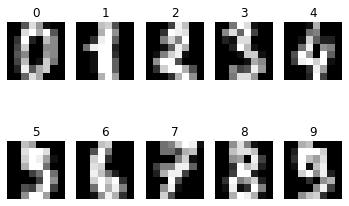

In [89]:
plt.Figure(figsize=(4,20))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.array(mnist.iloc[i,0:-1]).reshape(8,8),cmap='gray')
    plt.title("%d"%i)
    plt.axis('off')

plt.show()


아래는 설명변수 30개를 랜덤으로 뽑아서 박스플롯으로 시각화해보았다. 
- 설명변수 1,40, 23,8 등은 픽셀값(pixel values)이 대부분0이고 가장 큰 값이 8이하고, 그것도 전체 분포상 이상치에 속하는 것을 보아서 드문 값 같다. 그리고 설명변수 50,44등은 픽셀값이 0~16까지 고르게 분포되어있는 것을 볼 수 있다. 이렇게 설명변수의 값의 분포의 차이가 크므로 정규화(Normalization)을 시켜줄 필요가 있다.

__왜 정규화를 시켜줄까?__
- 대부분의 기계학습 알고리즘들이 최적화할때 변수 각각의 스케일 차이가 크면, 변수 전체의 스케일이 큰 특정 변수만 모델에 영향을 많이 미친다. 원하는 것은 데이터의 패턴을 읽는 것이기 때문에 학습을 방해하는 변수들 간의 스케일 차이를 비슷하게 만들어주는 정규화하는 전처리를 해줄 필요가 있다.

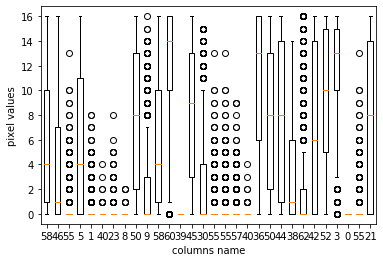

In [90]:
np.random.seed(4)
n=30
col=[np.random.randint(0,64) for i in range(n)] # 0~63 범위 안의 랜덤한 30개의 숫자를 뽑아서

plt.boxplot([mnist[col[i]] for i in range(n)]) # 박스플롯을 그려보았다
plt.xticks(list(range(1,n+1)),col)
plt.xlabel("columns name")
plt.ylabel("pixel values")
plt.show()

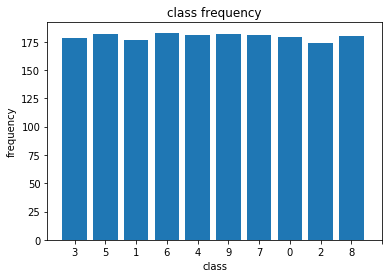

In [91]:
bar=mnist["Y"].value_counts() # 타겟 Y의 클래스별 개수

plt.bar(bar.index, bar)  # bar plot 그리기
plt.xticks(list(range(11)), bar.index)  # x축에 들어갈 레이블의 이름
plt.ylabel("frequency") # y축은 데이터의 수
plt.xlabel("class") # 클래스
plt.title("class frequency")
plt.show()

0~9까지 각 클래스별 데이터의 수는 비슷하다



- 데이터 정규화: mnist 데이터의 feature들을 0\~1사이의 값으로 정규화해주자. 이 이미지 데이터의 값이 가장 작은 값이 0, 가장 큰 값은 16이므로 설명변수들을 사이킷런의 MinMaxScaler()를 사용해서 0\~1사이 값으로 만들자

In [92]:
scaler = MinMaxScaler()

scaler.fit(mnist[feature_names])
X_Scaled=scaler.transform(mnist[feature_names])

### A- (4) train, test 데이터 분리

In [93]:
# iris 데이터셋 X_train, X_test, y_train, y_test를 분리한다.
X_train, X_test, y_train, y_test=train_test_split(X_Scaled,mnist["Y"], test_size=0.2,
                                                 random_state=7, stratify=mnist["Y"])


### A-(5) 다양한 모델로 학습시켜보기

- Decision Tree를 사용해보자

In [94]:
acc={}
models={}
# 의사결정트리 코드
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred=decision_tree.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
acc["Decision_Tree"]=accuracy
models["Decision_Tree"]=decision_tree
print(accuracy)

0.8611111111111112


- Random Forest 사용해보자

In [95]:
random_forest=RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred=random_forest.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
acc["Random_Forest"]=accuracy
models["Random_Forest"]=random_forest

print(accuracy)

0.9833333333333333


- SVM 사용해보기

In [96]:
svm_model=svm.SVC(kernel="rbf", C=10, gamma=0.1)
svm_model.fit(X_train, y_train)

y_pred=svm_model.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)

acc["SVM"]=accuracy
models["SVM"]=svm_model
print(accuracy)

0.9916666666666667


- SGD Classifier 사용해보기

In [97]:
sgd=SGDClassifier()
sgd.fit(X_train, y_train)

y_pred=sgd.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)

acc["SGD"]=accuracy
models["SGD"]=sgd
print(accuracy)

0.9527777777777777


- Logistic Regression 사용해보기

In [98]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

y_pred=LR.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)

acc["LR"]=accuracy
models["LR"]=LR
print(accuracy)

0.975


### A-(6) 모델 평가해보기

- 실제 정답(y_test)과 시험데이터셋의 설명변수(X_test)를 사용해서 모델에 예측한 값(y_pred)이 얼마나 많이 맞췄는지 가장 간단하게 체크하는 방법으로 accuracy를 체크해보자. 모델을 돌릴 때마다 딕셔너리 acc에 정확도를 모델별로 저장해보았다.
- 정확도(accuracy)는 __SVM >Random Forest > Logistic Regression> SGD >>> Decision Tree__ 순서이다.

- 가장 간단하게 모델을 비교하기는 좋지만 모델이 어떤 데이터를 잘못 예측했는지를 한눈에 보기는 어렵다.

-  __accuracy__ : 일단 클래스별 데이터양의 차이가 적고, 10개의 숫자손글씨를 말그대로 잘 예측하는게 중요하다고 생각한다. 그래서accuracy를 쓰는 것이 맞다고 생각한다. 숫자에는 양성이나 음성 종양이나 스팸처럼 어떤 가치가 있느냐를 매기는 것은 아니기 때문에 일단 accuracy를 써도 된다고 생각한다.

그리고 추가적으로 내가 데이터의 성능을 개선하고자 한다면 confusion matrix를 그려보긴 하겠다.  __왜냐하면 어떤 숫자를 어떤 숫자로 잘못 분류했는지를 체크하고, 분류를 잘못한 이미지 데이터를 관찰할 필요__ 가 있다고 생각이 들어서 그렇다. 
예측한 클래스를 어떤 클래스로 잘못 분류했는지 체크하려면 confusion matrix를 그려보면 한눈에 들어온다고 생각한다.

In [99]:
pd.Series(acc).sort_values(ascending=False) # 모델 정확도 accuracy

SVM              0.991667
Random_Forest    0.983333
LR               0.975000
SGD              0.952778
Decision_Tree    0.861111
dtype: float64

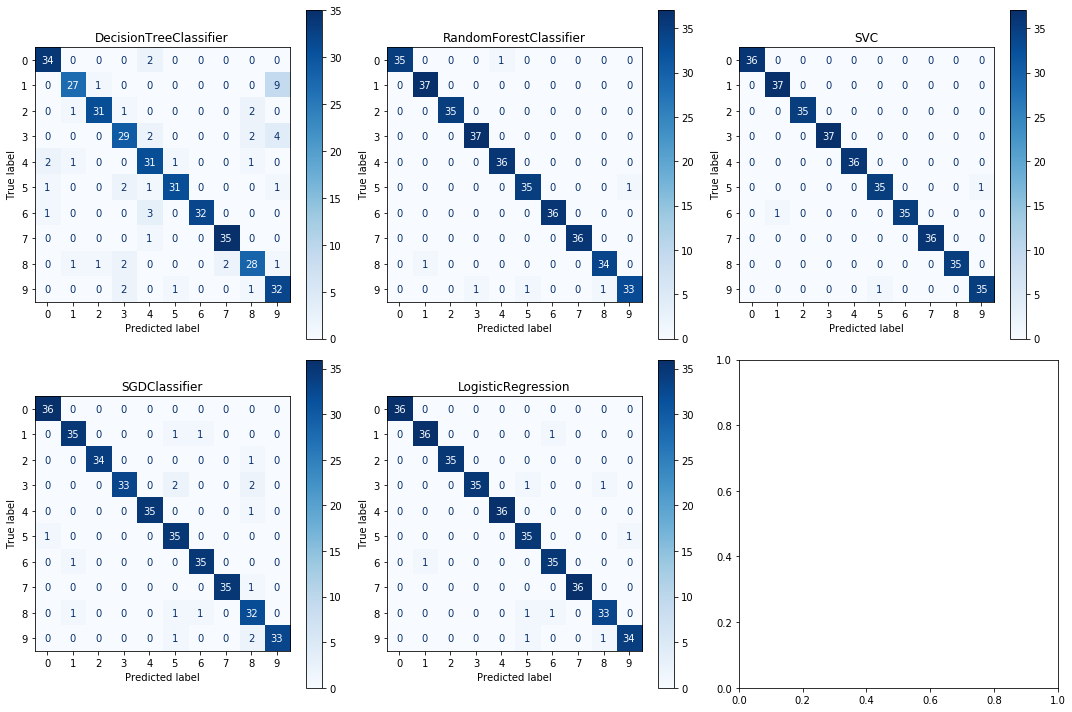

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for cls, ax in zip(models.keys(), axes.flatten()):
    if cls:
        plot_confusion_matrix(models[cls], 
                              X_test, 
                              y_test, 
                              ax=ax, 
                              cmap='Blues',
                             display_labels=label)
        ax.title.set_text(type(models[cls]).__name__)
    else:pass
plt.tight_layout()  
plt.show()

### 결론
- 일단 다른 분류기들은 대부분 구분을 잘 해내는 것을 볼수 있다.
- 단, Decision Tree 분류기는 다른 4가지 모델에 비해 정확도가 가장 떨어지는 모델이었다. 특히 14개의 데이터에 대해서 9번 클래스라고 예측해서 틀린 경우가 많았고, 그중에서도 9라고 예측했는데 실제로는 1인 경우가 9개의 케이스로 가장 많았다. 그래서 아래와 같이 실제로는 1인 데이터를 9로 예측한 이미지가 무엇인지 시각화해보고자 한다.

In [101]:
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred=decision_tree.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)


In [102]:
features=[]
T=[]
for i,(j,k) in enumerate(zip(y_test,y_pred)):
    if all([j==1,k==9]):
        features.append(i)
    elif all([j==1, k==1]):
        T.append(i)
    else:
        pass

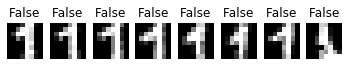

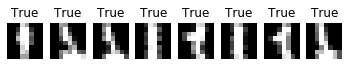

In [103]:
plt.Figure(figsize=(5,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_test[features][i].reshape(8,8), cmap='gray')
    plt.title("False")
    plt.axis('off')
plt.show()

plt.Figure(figsize=(5,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_test[T][i].reshape(8,8), cmap='gray')
    plt.title("True")
    plt.axis('off')
plt.show()

의사결정트리에서 잘 맞춘 이미지와 틀린 이미지를 시각화해보았다. 윗줄은 1을 9로 예측한 이미지인데 1의 윗부분에 꺽이는 부분이 둥근 이미지들의 9와 1을 잘 구분해내지 못하는 것으로 보인다고 생각했다. 1과 9의 애매해보이는 데이터를 학습데이터셋에 추가하는 방법도 있고 의사결정트리 트리의 오버피팅이 되는 것을 개선한 모델인 랜덤포레스트를 고르는 방법을 쓰는 것이 더 좋은 성능을 보인다는 것을 알게되었다.

## 프로젝트 B - load_wine: 와인을 분류해보자

### B-(2) 데이터 준비

In [104]:
wine=load_wine() #  와인 데이터 준비

### B-(3) 데이터 이해하기

- feature data 지정하기
- label data 지정하기
- target names 출력해보기


In [105]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [106]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [107]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

와인의 화학적인 구성 혹은 빛깔등을 연속형 데이터로 저장된 데이터 셋이다.

In [108]:
X=wine.data # feature data를 X에
Y=wine.target # target data를 Y에 지정한다.
label=wine.target_names # target names- 정답 데이터들에 뭐가 있나 볼수 있다.
print("Target Names 출력하기:",label)

Target Names 출력하기: ['class_0' 'class_1' 'class_2']


- 데이터 Describe 해보기

데이터의 모양
    - 훈련 데이터셋의 갯수는 178개, 설명변수(features) 13개인 2차원 데이터이다. 정답(target)은 1차원에 크기가 178이다.

In [109]:
print(X.shape,  Y.shape)

(178, 13) (178,)


In [110]:
wdf=pd.DataFrame(X, columns=wine.feature_names)
wdf["Y"]=Y

In [111]:
wdf.head() # 데이터의 첫부분

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


결측치 유무 
-  와인데이터프레임(wdf)에 info()와 isnull()를 적용해서 더해 본 결과 결측치값은 보이지는 않는다.

In [112]:
wdf.info() # 설명변수들은 float64로 실수형이고, target은 정수형으로 입력되어있다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
Y                               178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


In [113]:
print("각 컬럼별 결측치의 개수:",wdf.isnull().sum())
print("데이터 프레임 전체의 결측치 개수:", wdf.isnull().sum().sum())

각 컬럼별 결측치의 개수: alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Y                               0
dtype: int64
데이터 프레임 전체의 결측치 개수: 0


In [114]:
wdf.describe() # 데이터의 대푯값들

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


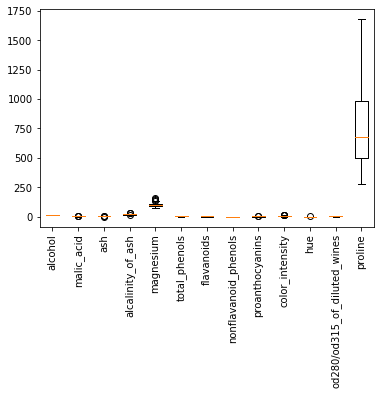

In [115]:
plt.boxplot([wdf[i] for i in wdf.columns[:-1]])
plt.xticks(range(1,14),wdf.columns[:-1], rotation=90)
plt.show()

describe와 박스플롯을 통해 데이터프레임의 13개의 feature를 살펴본 결과 평균값도 대푯값도 모두 다른 것을 알수 있다. 특히 proline의 범위는 다른 데이터들에 비해서 매우 큰편이라서 뒤에서 SVM모델을 사용할때 적절한 예측을 해내기 위해서는 스케일을 바꿔주는 것이 필수적이라고 생각된다.
즉, 데이터를 사이킷런의 MinMaxScaler()를 사용해서 0\~1사이 값으로 만들자

와인데이터셋의 모든 데이터가 연속형 변수라서 변수들 사이의 상관계수를 확인해보기 위해서 seaborn라이브러리를 사용하여 heatmap을 그려보았다. 밝은색은 높은 상관관계 어두운 색일수록 낮은 상관관계가 있다. heatmap 옆의 컬러바를 참조하면 된다.
- total phenols와 flavanoids가 proanthocyanins와 hue, od280/od315 of diluted wines 변수와 비교적 높은 상관관계에 있으며, 특히total phenols와 flavanoids의 상관계수가 높은 것으로 보인다.

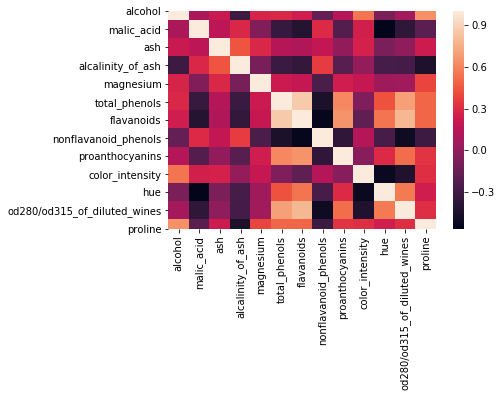

In [116]:
cor=wdf[wdf.columns[:-1]].corr()
sns.heatmap(cor)

plt.show() 

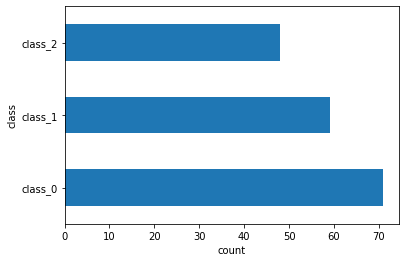

In [117]:
wdf["Y"].value_counts().plot(kind='barh')
plt.yticks([2,0,1],['class_2','class_0', 'class_1' ])
plt.ylabel("class")
plt.xlabel("count")
plt.show()

위는 전체 와인데이터셋의 타겟이 각각 몇개 있는지 막대그래프로 그려보았다. 클래스0이 70개이상 있어서 데이터가 가장 많고, class1, class2 순서로 적다. class2번 데이터는 50개미만으로 다른 데이터에 비해 양이 적다. 원래 train_test_split 함수를 사용할때 stratify인자를 설정하여서 클래스별로 균등한 데이터를 섞으려고 챙겼지만 이렇게 데이터의 클래스의 양이 불균질할때는 학습데이터와 테스트데이터셋을 나눌때 클래스 별로 분할하는 비율에 맞게 데이터를 섞어주어서 균등한 학습이 되도록 만든다.

In [118]:
scaler = MinMaxScaler()

scaler.fit(wdf[wdf.columns[:-1]])
X_Scaled=scaler.transform(wdf[wdf.columns[:-1]])

### B- (4) train, test 데이터 분리

In [119]:
# iris 데이터셋 X_train, X_test, y_train, y_test를 분리한다.
X_train, X_test, y_train, y_test=train_test_split(X_Scaled,wdf["Y"], test_size=0.2,
                                                 random_state=7, stratify=wdf["Y"])


### B-(5) 다양한 모델로 학습시켜보기

### B-(6) 모델 평가해보기

- 각 모델별로 학습을 시키고 바로 평가를 하기로 했다. 

- 가장 간단한 평가지표는 정확도이지만, 데이터의 클래스가 균일하지 않는 밸런스가 맞지 않는 데이터이기 때문에 이 정확도는 쓸수 없다. 와인 데이터는 가장 데이터가 많은 클래스는 70개 이상, 가장 데이터가 적은 클래스는 50개 미만의 데이터가 있다. 데이터 간의 차이가 많이 나는 편이다.
- __F1스코어__ 는 정밀도와 재현율의 가중조화평균(weight harmonic average)으로 밸런스가 잘 맞지 않는 데이터에도 성능을 정확히 평가한다.

In [120]:
f1={}
acc={}

decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred=decision_tree.predict(X_test)

acc["Decision_Tree"]=accuracy_score(y_test, y_pred)
f1["Decision_Tree"]=f1_score(y_test, y_pred, average='weighted')

- Random Forest 사용해보자

In [121]:
random_forest=RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred=random_forest.predict(X_test)

acc["random_forest"]=accuracy_score(y_test, y_pred)
f1["random_forest"]=f1_score(y_test, y_pred, average='weighted')

- SVM 사용해보기

In [122]:
svm_model=svm.SVC(kernel="rbf", C=10, gamma=0.1)
svm_model.fit(X_train, y_train)

y_pred=svm_model.predict(X_test)

acc["svm"]=accuracy_score(y_test, y_pred)
f1["svm"]=f1_score(y_test, y_pred, average='weighted')

- SGD Classifier 사용해보기

In [123]:
sgd=SGDClassifier()
sgd.fit(X_train, y_train)

y_pred=sgd.predict(X_test)

acc["sgd"]=accuracy_score(y_test, y_pred)
f1["sgd"]=f1_score(y_test, y_pred, average='weighted')

- Logistic Regression 사용해보기

In [124]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

y_pred=LR.predict(X_test)

acc["LR"]=accuracy_score(y_test, y_pred)
f1["LR"]=f1_score(y_test, y_pred, average='weighted')

In [125]:
pd.Series(acc).sort_values(ascending=False) # 모델 정확도 accuracy

random_forest    1.000000
LR               0.972222
svm              0.972222
sgd              0.916667
Decision_Tree    0.888889
dtype: float64

In [126]:
pd.Series(f1).sort_values(ascending=False) # 모델 정확도 accuracy

random_forest    1.000000
svm              0.972369
LR               0.972097
sgd              0.914747
Decision_Tree    0.887739
dtype: float64

- 정확도(accuracy)는 __Random Forest > Logistic Regression=>SVM > SGD >>> Decision Tree__ 순서이다.
- f1 스코어는 __Random Forest > SVM > Logistic Regression > SGD > Decision Tree__ 순서이다.
- F1 스코어가 가장 높은 Random Forest가 와인 데이터셋에 가장 좋은 모델이라고 생각한다. 
- 그리고 정확도에서 서로 비슷했던 Logistic Regression과 SVM이 어떤 평가지표를 쓰느냐에 따라서 모델 성능에 대한 평가가 달라진다는 점을 유의할 필요가 있다고 느꼈다.

## 프로젝트 C - load_breast_cancer: 유방암 여부를 진단하자

### C-(2) 데이터 준비

In [127]:
cancer=load_breast_cancer() #  와인 데이터 준비

### C-(3) 데이터 이해하기

- feature data 지정하기
- label data 지정하기
- target names 출력해보기


In [128]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [129]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [130]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

위스콘신 유방암데이터로 종양의 지름, 면적등을 연속형 데이터로 저장된 데이터 셋이다.
target 데이터 이름의 malignant는 악성종양(0) benign은 그냥종양(1)이다.

In [131]:
X=cancer.data # feature data를 X에
Y=cancer.target # target data를 Y에 지정한다.
label=cancer.target_names # target names- 정답 데이터들에 뭐가 있나 볼수 있다.
print("Target Names 출력하기:",label)

Target Names 출력하기: ['malignant' 'benign']


- 데이터 Describe 해보기

데이터의 모양
    - 훈련 데이터셋의 갯수는 569개, 설명변수(features) 30개인 2차원 데이터이다. 정답(target)은 1차원에 크기가 178이다.

In [132]:
print(X.shape,  Y.shape)

(569, 30) (569,)


In [133]:
cdf=pd.DataFrame(X, columns=cancer.feature_names)
cdf["Y"]=Y

In [134]:
cdf.head() # 데이터의 첫부분

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


타겟Y은 0과 1로 되어있고, 0이 악성종양, 1이 그냥 종양이다. 아래의 바 그래프에서 보듯이 그냥 종양(1)이 악성종양보다 데이터의 100개 이상이 더 많다. 즉, accuracy는 쓸수 없다.

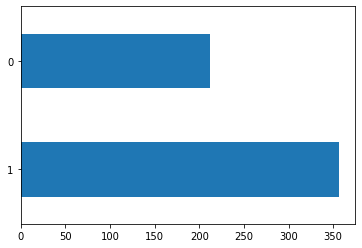

In [135]:
cdf["Y"].value_counts().plot(kind="barh")
plt.show()

결측치 유무 
-  유방암 데이터프레임(wdf)의 info()도 실행해보고 isnull()를 적용해서 더해 본 결과 결측치값은 보이지는 않는다.

In [136]:
cdf.info() # 설명변수들은 float64로 실수형이고, target은 정수형으로 입력되어있다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [137]:
print("각 컬럼별 결측치의 개수:",cdf.isnull().sum())
print("데이터 프레임 전체의 결측치 개수:", cdf.isnull().sum().sum())

각 컬럼별 결측치의 개수: mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Y                          0
dtype: int64
데이터 프레임 전체의 결측치 개수: 0


In [138]:
cdf.describe() # 데이터의 대푯값들

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


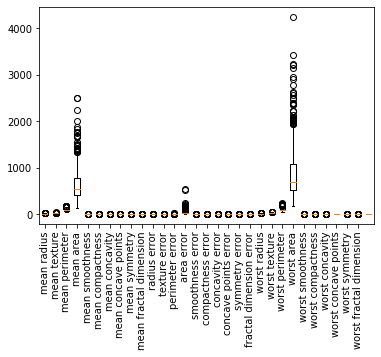

In [139]:
plt.boxplot([cdf[i] for i in cdf.columns])
plt.xticks(range(1,cdf.shape[1]),cdf.columns, rotation=90)
plt.show()

describe와 박스플롯을 통해 유방암 데이터프레임의 30개의 feature를 살펴본 결과 평균값도 중앙값도 다른 것을 알수 있다. 특히 mean area, worst area의 범위는 최소 100부근에서 최대 2천 이상의 범위를 갖고 있으므로 스케일링 과정이 역시 필요하다.
- 아래 히트맵과 히트맵에서 상관관계가 높은 변수들의 scatter plot을 그려보니 다음과 같이 상관관계를 갖는 것을 알수 있다.

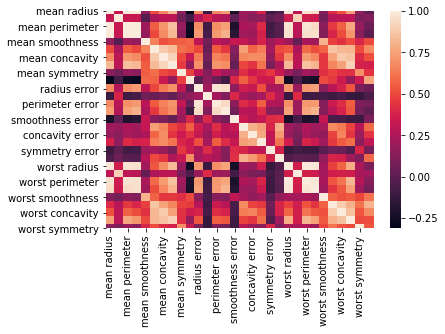

In [140]:
cor=cdf[cdf.columns[:-1]].corr()
plt.Figure(figsize=(15,15))
sns.heatmap(cor)

plt.show() 

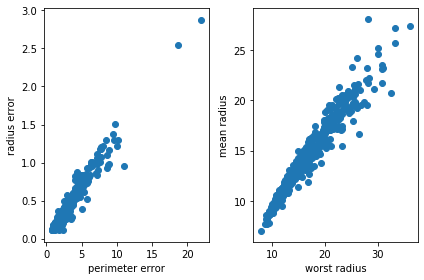

In [141]:
plt.Figure(figsize=(5,25))

plt.subplot(121)
plt.scatter(cdf["perimeter error"],cdf["radius error"])
plt.xlabel("perimeter error")
plt.ylabel("radius error")
plt.tight_layout()

plt.subplot(122)
plt.scatter(cdf["worst radius"],cdf["mean radius"])
plt.xlabel("worst radius")
plt.ylabel("mean radius")
plt.tight_layout()
plt.show()

In [142]:
scaler = MinMaxScaler()

scaler.fit(cdf[cdf.columns[:-1]])
X_Scaled=scaler.transform(cdf[cdf.columns[:-1]])

MinMaxScaler를 걸어본 결과 다음과 같이 최대 최소 값의 범위가 0~1사이로 스케일링 되었다.

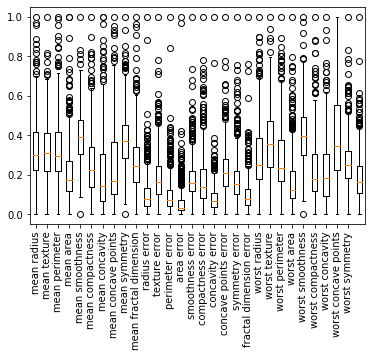

In [143]:
s=pd.DataFrame(X_Scaled, columns=cdf.columns[:-1])
plt.boxplot([s[i] for i in s.columns])
plt.xticks(range(1,s.shape[1]),s.columns, rotation=90)
plt.show()

### B- (4) train, test 데이터 분리

In [144]:
# iris 데이터셋 X_train, X_test, y_train, y_test를 분리한다.
X_train, X_test, y_train, y_test=train_test_split(X_Scaled,cdf["Y"], test_size=0.2,
                                                 random_state=7, stratify=cdf["Y"])


### B-(5) 다양한 모델로 학습시켜보기

### B-(6) 모델 평가해보기

- 각 모델별로 학습을 시키고 바로 평가를 하기로 했다. 

- 이 데이터는 악성종양(0) 데이터가 그냥종양(1)보다 양이 적다.  그러므로 정확도를 쓸수가 없다.
- 무엇보다도 암은 그냥 종양(1)을 악성종양(0)으로 예측하는 것(FP)보다 악성종양(0)을 그냥 종양(1)으로 예측하는 것(FN)이 더 위험하다.
- __Recall__: 유방암데이터는 이런 이유로 recall을 평가지표로 쓰려고 한다. 그냥 종양(1)을 악성종양(0)이라고 예측(FP)을 한다면, 2차검사를 받으면 되지만 악성종양(0)을 그냥 종양(1)으로 예측(FN)을 한다면 환자는 자신이 재검사를 받을 기회를 놓치게 되고 암이 더 악화된다. 즉, recall이 1에 가장 가까운 모델이 성능이 가장 좋은 모델이다.

In [145]:
recall={}
acc={}

decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred=decision_tree.predict(X_test)
acc["Decision_Tree"]=accuracy_score(y_test, y_pred)
recall["Decision_Tree"]=recall_score(y_test, y_pred)

In [146]:
print(recall_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9166666666666666


array([[40,  2],
       [ 6, 66]], dtype=int64)

- Random Forest 사용해보자

In [147]:
random_forest=RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred=random_forest.predict(X_test)


recall["random_forest"]=recall_score(y_test, y_pred)
acc["random_forest"]=accuracy_score(y_test, y_pred)


In [148]:
print(recall_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9583333333333334


array([[40,  2],
       [ 3, 69]], dtype=int64)

- SVM 사용해보기

In [149]:
svm_model=svm.SVC(kernel="rbf", C=10, gamma=0.1)
svm_model.fit(X_train, y_train)

y_pred=svm_model.predict(X_test)


recall["svm"]=recall_score(y_test, y_pred)
acc["svm"]=accuracy_score(y_test, y_pred)


In [150]:
print(recall_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9861111111111112


array([[40,  2],
       [ 1, 71]], dtype=int64)

- SGD Classifier 사용해보기

In [151]:
sgd=SGDClassifier()
sgd.fit(X_train, y_train)

y_pred=sgd.predict(X_test)

recall["sgd"]=recall_score(y_test, y_pred)
acc["sgd"]=accuracy_score(y_test, y_pred)


In [152]:
print(recall_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

1.0


array([[40,  2],
       [ 0, 72]], dtype=int64)

- Logistic Regression 사용해보기

In [153]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

y_pred=LR.predict(X_test)

acc["LR"]=accuracy_score(y_test, y_pred)
recall["LR"]=recall_score(y_test, y_pred)

In [154]:
print(recall_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9861111111111112


array([[38,  4],
       [ 1, 71]], dtype=int64)

In [155]:
acc=pd.Series(acc).sort_values(ascending=False) 
acc # 그냥 정확도

sgd              0.982456
svm              0.973684
LR               0.956140
random_forest    0.956140
Decision_Tree    0.929825
dtype: float64

In [156]:
recall=pd.Series(recall).sort_values(ascending=False) # recall 
recall # recall

sgd              1.000000
LR               0.986111
svm              0.986111
random_forest    0.958333
Decision_Tree    0.916667
dtype: float64

유방암데이터를 stochastic gredient descent로 학습시킨 모델이 Recall 가장 높고, 정확도 역시 높지만, 다음 SVM, LR, random forest의 경우는 순위가 다르다. 내가 필요한 결과를 반영하는 평가지표가 무엇인지 꼼꼼히 고찰하는 시간을 자주 갖도록 해야겠다고 생각했다.

## 회고

0. 숫자손글씨(mnist) 분류, 와인분류, 유방암 데이터. 사이킷런에 포함된 데이터셋을 사용하여 데이터를 EDA하고, EDA한 결과를 기반으로 데이터를 정규화시키고 데이터를 어떻게 고르게 배분할지도 고민하고, 마지막으로 평가지표를 어떤 것을 고르면 좋을지에 대해서 고민할 수 있던 시간이었다.
1. 인상 깊었던 점으로는 와인분류와 유방암 데이터셋의 경우 클래스별 데이터양의 차이가 커서 accuracy가 모델의 정확도를 보장하기 힘들다는 점을 노드와 책에서 읽었지만 잘 와닿지 않았었다. 이를 실제로 데이터로 돌려보고 필요에 의해서 (유방암의 recall), 혹은 데이터양이 불균형(와인 데이터셋, f1 score)에 의해서 모델평가가 달라지고 데이터로 어떤 중요한 판단을 내릴때 판단 기준을 도와주는 설계라는 생각이 들었다. 
2. 만능 기계학습 모델이란 없다는 생각이 들었다. 세개의 데이터셋이 각자 가장 좋은 학습방법이 다르다는 점이 흥미로웠다. 손글씨는 랜덤포레스트, 와인분류는 SVM, 유방암데이터는 SGD가 가장 좋은 성능을 냈다는 점에서 결국 예측모델을 만든다는 건 데이터에 잘맞는 모델을 고민하고 만들어가는 것이 아닐까 생각이 들었다. 
3. EDA하고 데이터 시각화하는 과정에서 예쁜 보고서 그래프를 많이 그리는게 목적이 아니라 어떻게 모델을 더 잘만들지 관찰하는 행위 같다는 생각을 했다. 그래서 feature의 스케일을 보고 정규화도 시키고 정규화 시킨 데이터를 다시 시각화하면서 어떻게 데이터가 바뀌는지도 관찰한 경험을 앞으로 계속 분석 노드를 학습하는 과정에서 반복해서 작업하고 익숙해지도록 해야겠다. 더 나아가 모델을 데이터에 잘 맞도록 고르는 눈과 평가지표를 합리적으로 선택하는 것을 반복해서 학습해야겠다고 다짐했다.